# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Import a 311 NYC service request.

In [2]:
data_nyc = pd.read_csv("C:\\Users\\hp\\Data\\311_Service_Requests_from_2010_to_Present.csv", low_memory=False)

data_nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
#Shape of DataFrame

data_nyc.shape

(300698, 53)

In [4]:
# Columns of DataFrame

data_nyc.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
#Check which column has how many missing values

data_nyc.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [6]:
# City is important column and have many missing values

data_nyc[data_nyc['City'].isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
33,32306700,12/31/2015 11:18:10 PM,01-02-16 1:04,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,25-0-25-54 12TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,32309451,12/31/2015 05:40:16 PM,01-01-16 10:59,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,72-23-72-2 72ND PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,32309860,12/31/2015 05:05:30 PM,01-01-16 8:17,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,NaN,9-15-9-99 CORNAGA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,12/31/2015 09:58:06 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,03/29/2015 02:40:19 PM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300492,30284963,03/29/2015 08:50:15 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300496,30285492,03/29/2015 08:44:13 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300620,30282717,03/29/2015 01:55:35 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_nyc['City'].fillna('Unknown City', inplace =True)

data_nyc['City']

0              NEW YORK
1               ASTORIA
2                 BRONX
3                 BRONX
4              ELMHURST
              ...      
300693     Unknown City
300694    RICHMOND HILL
300695         BROOKLYN
300696            BRONX
300697         NEW YORK
Name: City, Length: 300698, dtype: object

In [8]:
# Closed Date is important column and have many missing values

data_nyc[data_nyc['Closed Date'].isnull()]


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,12/31/2015 09:58:06 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,32303348,12/30/2015 05:13:42 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,32294519,12/29/2015 10:44:50 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,32296487,12/29/2015 07:09:13 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,03/29/2015 02:40:19 PM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300492,30284963,03/29/2015 08:50:15 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300496,30285492,03/29/2015 08:44:13 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300620,30282717,03/29/2015 01:55:35 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#data_nyc['Closed Date'].fillna('Unspecified', inplace =True)

#data_nyc['Closed Date']

In [10]:
#Noted one row by its unique key column that is 32305700
#To check changes everytime we do something for Closed Date or related column

#data_nyc[data_nyc['Unique Key'] == 32305700]


In [11]:
# Check data type of each column

data_nyc.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

# Import Datetime Liberaries

In [12]:
import datetime as dt
import time, datetime

# Convert the columns ‘Created Date’ and Closed Date’ to datetime datatype

In [13]:
# Convert "Closed Date" to datetime dtype
data_nyc['Closed Date'] = pd.to_datetime(data_nyc['Closed Date'])


# Convert "Created Date" to datetime dtype
data_nyc['Created Date'] = pd.to_datetime(data_nyc['Created Date'])


In [14]:
data_nyc.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

# Create a new column ‘Request_Closing_Time’
#As the time elapsed between request creation and request closing.

In [15]:
# Create new column Request_Closing_Time with time taken to close complain

data_nyc['Request_Closing_Time'] = data_nyc['Closed Date'] - data_nyc['Created Date']

data_nyc['Request_Closing_Time'].head()

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [16]:
data_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300698 non-null  int64          
 1   Created Date                    300698 non-null  datetime64[ns] 
 2   Closed Date                     298534 non-null  datetime64[ns] 
 3   Agency                          300698 non-null  object         
 4   Agency Name                     300698 non-null  object         
 5   Complaint Type                  300698 non-null  object         
 6   Descriptor                      294784 non-null  object         
 7   Location Type                   300567 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-n

# Drop all the columns of 0 non-null values

In [17]:
data_nyc = data_nyc.drop(["Garage Lot Name","Taxi Pick Up Location","Taxi Company Borough","Vehicle Type","School or Citywide Complaint"],axis=1)

data_nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02


In [18]:
data_nyc.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude',
       'Location', 'Request_Closing_Time'],
      dtype='object

In [20]:
#Analysis of city and the complaints

In [21]:
data_nyc['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'Unknown City',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [22]:
data_nyc['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [23]:
data_nyc['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

# Data Analysis in regards of City

In [24]:
data_nyc["City"].value_counts().head(10)

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
ASTORIA           6330
FLUSHING          5971
RIDGEWOOD         5163
CORONA            4295
WOODSIDE          3544
Name: City, dtype: int64

In [25]:
# Max complaint calls are received from Brooklyn.

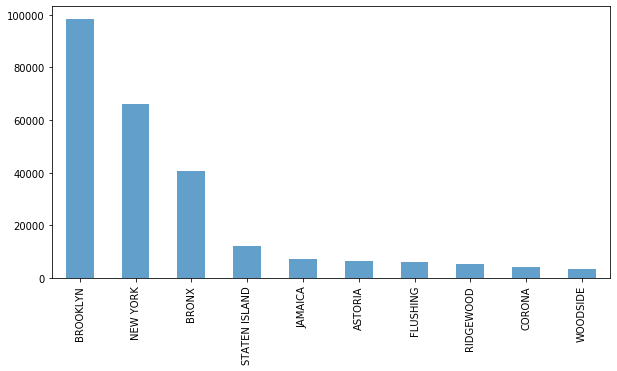

In [26]:
#Plot of the Complaint by city

data_nyc['City'].value_counts().head(10).plot(kind='bar', alpha=0.7, figsize=(10,5))

plt.show()

# Data Analysis in regards of Complaint Type

In [27]:
max_complaint = data_nyc.groupby("Complaint Type")
Complaint_count = max_complaint.size().sort_values(ascending = False)
Complaint_count = Complaint_count.to_frame('count').reset_index()

Complaint_count.head(10)

,Complaint Type,count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


In [28]:
#major complaints are Blocked Driveway

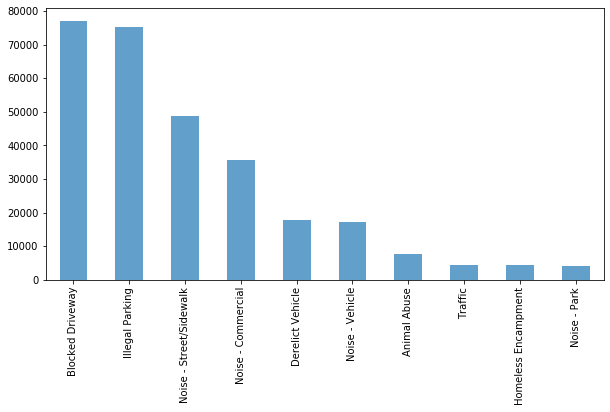

In [29]:
#Type of complaints

data_nyc['Complaint Type'].value_counts().head(10).plot(kind='bar', alpha=0.7, figsize=(10,5))

plt.show()

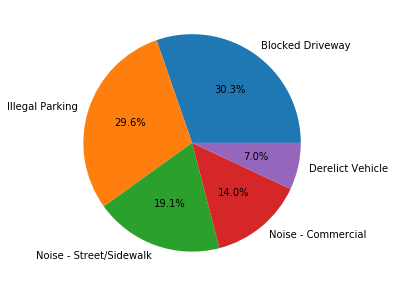

In [30]:
Complaint_count = Complaint_count.head()
plt.figure(figsize=(5,5))
plt.pie(Complaint_count['count'],labels=Complaint_count["Complaint Type"], autopct="%1.1f%%")
plt.show()

# Data Analysis in regards of Complaint Type and City 

In [31]:
complaint_city = pd.DataFrame({'count': data_nyc.groupby(['Complaint Type','City']).size().sort_values(ascending = False)}).reset_index()

complaint_city 

,Complaint Type,City,count
0,Blocked Driveway,BROOKLYN,28148
1,Illegal Parking,BROOKLYN,27462
2,Noise - Street/Sidewalk,NEW YORK,20433
3,Noise - Commercial,NEW YORK,14550
4,Noise - Street/Sidewalk,BROOKLYN,13356
...,...,...,...
777,Illegal Fireworks,OZONE PARK,1
778,Blocked Driveway,Howard Beach,1
779,Illegal Fireworks,MASPETH,1
780,Illegal Fireworks,JACKSON HEIGHTS,1


# Check count for status of complaints

In [32]:
data_nyc['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

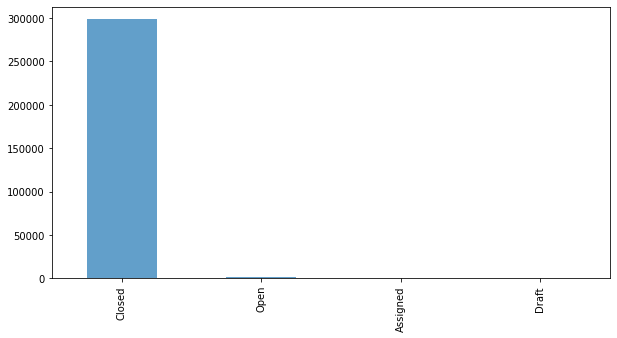

In [33]:
data_nyc['Status'].value_counts().head(10).plot(kind='bar',alpha=0.7,figsize=(10,5))
plt.show()

# Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.


In [34]:
# For location we look for the City, 
#first check if there is missing values there


In [35]:
# Group them for City (location) first and Complain Type in that
data_nyc_grouped = data_nyc.groupby(['City', 'Complaint Type'])

In [36]:
# we convert TimeDelta in Hour just for the Request_closing_time

def Hour(timeDelta):
    days = timeDelta.days
    hours = round(timeDelta.seconds/3600, 2)
    result = (days * 24) + hours
    #print(days)
    #print(hours)
    return result
    #return round(pd.Timedelta(timeDel).seconds / 3600, 2)

In [37]:
data_nyc['Request_Closing_In_Hr'] = data_nyc['Request_Closing_Time'].apply(Hour)

data_nyc['Request_Closing_In_Hr']

0         0.92
1         1.44
2         4.86
3         7.75
4         3.45
          ... 
300693     NaN
300694    2.01
300695    3.12
300696    4.09
300697    4.15
Name: Request_Closing_In_Hr, Length: 300698, dtype: float64

In [38]:
# Categorize hours to visualize its responsding time
#- Less than 2 hours -Fast, 
# Between 2 to 4 hours  Acceptable, 
# Between 4 to 6 - Slow, 
#More than 6 hours - Very Slow

In [39]:
import math

def Category(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif (4.0 > hr >= 2.0):
        return 'Acceptable'
    elif (6.0 > hr >= 4.0):
        return 'Slow'
    else:
        return 'Very Slow'

# Create new column Request_Closing_Time_Category and apply function on column Request_Closing_In_Hr

data_nyc['Request_Closing_Time_Category'] = data_nyc['Request_Closing_In_Hr'].apply(Category)

data_nyc['Request_Closing_Time_Category']

0                Fast
1                Fast
2                Slow
3           Very Slow
4          Acceptable
             ...     
300693    Unspecified
300694     Acceptable
300695     Acceptable
300696           Slow
300697           Slow
Name: Request_Closing_Time_Category, Length: 300698, dtype: object

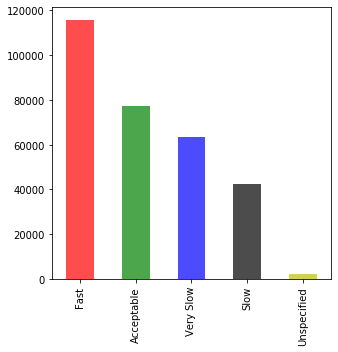

In [40]:
data_nyc['Request_Closing_Time_Category'].value_counts()

# Create Bar plot for Request_Closing_Time_Category to check frequency in Request_Closing_Time_Category 

data_nyc['Request_Closing_Time_Category'].value_counts().plot(kind="bar", color=list('rgbkymc'), alpha=0.7, figsize=(5,5))
plt.show()

In [41]:
# it prove Most count is in Fast category means closed less than 2 hours

In [42]:
# Group by City(location) first and then Complain Type and showing average of Request Closing in Hour

data_nyc_group = data_nyc.groupby(['City','Complaint Type']).agg({'Request_Closing_In_Hr': 'mean'})
data_nyc_group

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]

In [43]:
# Check if any value is NaN
data_nyc_group[data_nyc_group['Request_Closing_In_Hr'].isnull()]

Request_Closing_In_Hr
City         Complaint Type                                 
Unknown City Ferry Complaint                             NaN
             Noise - House of Worship                    NaN
             Panhandling                                 NaN
             Posting Advertisement                       NaN

In [44]:
# drop null values from this group
data_nyc_group_withoutna = data_nyc_group.dropna()

In [45]:
# verify if new group has null values
data_nyc_group_withoutna.isnull().sum()

Request_Closing_In_Hr    0
dtype: int64

In [46]:
# Sorting 'Request_Closing_In_Hr' for City on grouped
data_nyc_new = data_nyc_group_withoutna.sort_values(['City', 'Request_Closing_In_Hr'])
data_nyc_new

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Drinking                              0.240000
         Vending                               0.480000
         Urinating in Public                   0.690000
         Panhandling                           1.030000
         Noise - Park                          1.285000
...                                                 ...
Woodside Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Blocked Driveway                      6.405455

[778 rows x 1 columns]

# Statistical test for the relation of average response time across complaint types 

In [47]:
import scipy.stats as stats
from math import sqrt

In [48]:
top_complaints = data_nyc['Complaint Type'].value_counts().head(10)

top_complaints

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

In [49]:
top_complaints_type = top_complaints.index

Complaint_data = data_nyc.loc[data_nyc['Complaint Type'].isin(top_complaints_type), ['Complaint Type', 'Request_Closing_In_Hr']]

Complaint_data.head(10)

,Complaint Type,Request_Closing_In_Hr
0,Noise - Street/Sidewalk,0.92
1,Blocked Driveway,1.44
2,Blocked Driveway,4.86
3,Illegal Parking,7.75
4,Illegal Parking,3.45
5,Illegal Parking,1.89
6,Illegal Parking,1.96
7,Blocked Driveway,1.80
8,Illegal Parking,8.55
9,Blocked Driveway,1.38


In [50]:
Complaint_data.isnull().sum()

Complaint Type              0
Request_Closing_In_Hr    2141
dtype: int64

In [51]:
Complaint_data.dropna(how='any', inplace=True)
Complaint_data.isnull().sum()

Complaint Type           0
Request_Closing_In_Hr    0
dtype: int64

In [52]:
# Here 

In [53]:
sample1 = Complaint_data[Complaint_data['Complaint Type'] == top_complaints_type[0]].Request_Closing_In_Hr

sample1.head()

1     1.44
2     4.86
7     1.80
9     1.38
10    7.80
Name: Request_Closing_In_Hr, dtype: float64

In [54]:
sample2 = Complaint_data[Complaint_data['Complaint Type'] == top_complaints_type[1]].Request_Closing_In_Hr

sample2.head()

3    7.75
4    3.45
5    1.89
6    1.96
8    8.55
Name: Request_Closing_In_Hr, dtype: float64

In [55]:
sample3 = Complaint_data[Complaint_data['Complaint Type'] == top_complaints_type[2]].Request_Closing_In_Hr

sample3.head()

0     0.92
12    2.48
19    0.78
38    0.49
54    1.50
Name: Request_Closing_In_Hr, dtype: float64

In [56]:
sample4 = Complaint_data[Complaint_data['Complaint Type'] == top_complaints_type[3]].Request_Closing_In_Hr

sample4.head()

17    0.85
18    2.93
22    1.26
29    2.50
30    1.99
Name: Request_Closing_In_Hr, dtype: float64

In [57]:
sample5 = Complaint_data[Complaint_data['Complaint Type'] == top_complaints_type[4]].Request_Closing_In_Hr

sample5.head()

14     10.49
151     3.95
255     1.36
256     4.13
295     0.75
Name: Request_Closing_In_Hr, dtype: float64

In [58]:
print(sample1.isnull().sum())
print(sample2.isnull().sum())
print(sample3.isnull().sum())
print(sample4.isnull().sum())
print(sample5.isnull().sum())

0
0
0
0
0


In [59]:
#Analysis of variance (ANOVA) used to analyze the differences among group means in a sample.

#stats.f_oneway Performs a 1-way ANOVA. 

#It tests the null hypothesis that two or more groups have the same population mean. T

In [60]:
stats.f_oneway(sample1, sample2, sample3, sample4, sample5)

F_onewayResult(statistic=1799.598683238952, pvalue=0.0)

In [61]:
#The p-value or probability value is the probability of obtaining test results

#1 indicates a rejection of the null hypothesis.

#0 indicates a failure to reject the null hypothesis

#We can see pvalue is less than 0.05 so we reject null hypothesis and average response time is not same.

# Statistical test for the correlation of type of complaint or service requested and location 

In [62]:
top_location = data_nyc['City'].value_counts()

top_location.head(10)

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
ASTORIA           6330
FLUSHING          5971
RIDGEWOOD         5163
CORONA            4295
WOODSIDE          3544
Name: City, dtype: int64

In [63]:
top_location_name = top_location.head(10).index

top_location_name

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA', 'ASTORIA',
       'FLUSHING', 'RIDGEWOOD', 'CORONA', 'WOODSIDE'],
      dtype='object')

In [64]:
data_location = data_nyc.loc[(data_nyc['Complaint Type'].isin(top_complaints_type)) & (data_nyc['City'].isin(top_location_name)), ['Complaint Type', 'City']]

data_location

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN
...,...,...
300691,Noise - Commercial,NEW YORK
300692,Noise - Commercial,NEW YORK
300695,Noise - Commercial,BROOKLYN
300696,Noise - Commercial,BRONX


In [65]:
pd.crosstab(data_location['Complaint Type'], data_location['City'], margins=True)

City,ASTORIA,BRONX,BROOKLYN,CORONA,FLUSHING,JAMAICA,NEW YORK,RIDGEWOOD,STATEN ISLAND,WOODSIDE,All
Complaint Type,,,,,,,,,,,
Animal Abuse,125,1415,2394,61,143,229,1525,117,557,69,6635
Blocked Driveway,2618,12755,28148,2761,2795,2818,2072,1694,2142,1613,59416
Derelict Vehicle,351,1953,5181,57,440,954,537,330,1766,247,11816
Homeless Encampment,32,247,857,19,26,79,2775,23,71,33,4162
Illegal Parking,1068,7859,27462,660,1829,1421,12128,1842,4886,891,60046
Noise - Commercial,1293,2434,11463,248,175,429,14550,398,678,209,31877
Noise - Park,61,547,1555,24,58,38,1211,28,67,38,3627
Noise - Street/Sidewalk,386,8892,13356,238,225,339,20433,433,819,250,45371
Noise - Vehicle,204,3396,5177,100,129,302,5485,217,356,105,15471


In [66]:
#Chi-Square test

#A statistical test applied to sets of categorical data.

#To evaluate any difference between the sets arose by chance.

In [67]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(data_location['Complaint Type'], data_location['City']))

In [68]:
print(ch2)
print(p_value)

58317.8126936561
0.0


In [ ]:
#pvalue is less than 0.05 so we reject null hypothesis.

#A coefficient of 0 indicates that there is no linear relationship.)

#1 indicates a rejection of the null hypothesis at the 5% significance level, 

#0 indicates a failure to reject the null hypothesis at the 5% significance level. 
#(Failing to reject the null indicates that our sample did not provide sufficient evidence to conclude that the effect exists.)

#A very small chi square test statistic means that your observed data fits your expected data extremely well, there is a relationship.

#A very large chi square test statistic means that the data does not fit very well. In other words, there isn't a relationship.